In [2]:
#Wine quality assesment
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#Loading data
wine=pd.read_csv('wine.csv')

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.shape

(1599, 12)

In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
Y = wine[['quality']]
X = wine.drop(['quality'], axis=1)

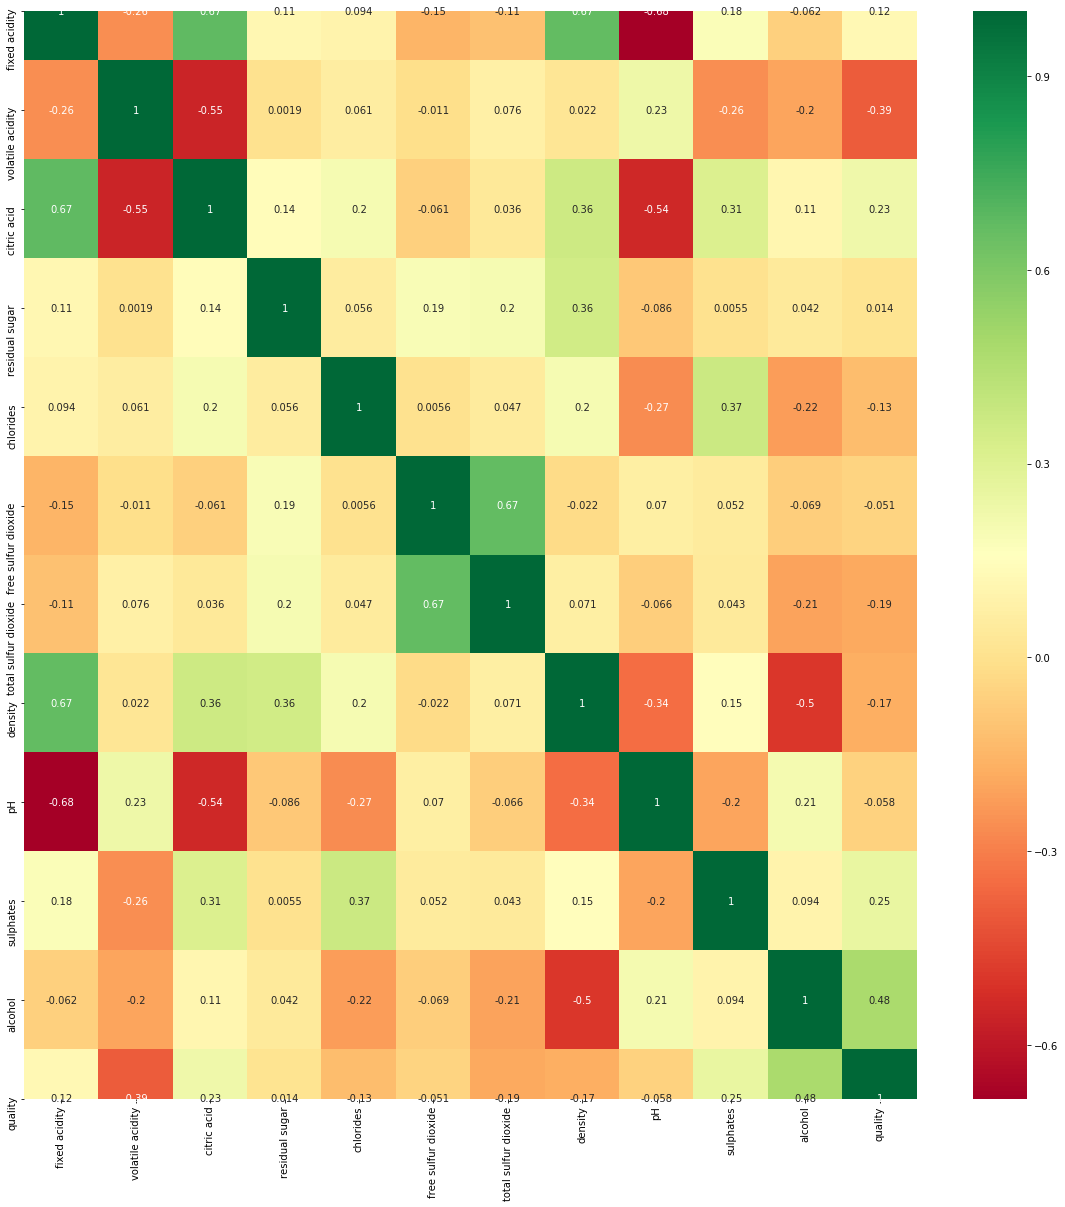

In [10]:
#get correlations of each features in dataset
corrmat = wine.corr() 
top_corr_features = corrmat.index 
plt.figure(figsize=(20,20)) #plot heat map
g=sns.heatmap(wine[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#From above we can find that residual sugar is vvery near to 0 than other feartures. So we can neglect it and take other 10 features to get score

In [11]:
#The top 10 features does not contain residual sugar feature, so I removed it
Xnew = wine.drop(['quality','residual sugar'], axis=1)
Y=wine[['quality']]

In [12]:
#Train and split 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xnew, Y, test_size=0.2, random_state=365)

In [13]:
from sklearn.ensemble import RandomForestClassifier
randomwine = RandomForestClassifier()
randomwine.fit(X_train, Y_train)

C:\Users\ghost\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ghost\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
randomwineo = RandomForestClassifier(n_estimators=30)
randomwineo.fit(X_train, Y_train)
randomwineo.score(X_test,Y_test)

C:\Users\ghost\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.7375